# Sentiment Classification & How To "Frame Problems" for a Neural Network

by Andrew Trask

- **Twitter**: @iamtrask
- **Blog**: http://iamtrask.github.io

### What You Should Already Know

- neural networks, forward and back-propagation
- stochastic gradient descent
- mean squared error
- and train/test splits

### Where to Get Help if You Need it
- Re-watch previous Udacity Lectures
- Leverage the recommended Course Reading Material - [Grokking Deep Learning](https://www.manning.com/books/grokking-deep-learning) (40% Off: **traskud17**)
- Shoot me a tweet @iamtrask


### Tutorial Outline:

- Intro: The Importance of "Framing a Problem"


- Curate a Dataset
- Developing a "Predictive Theory"
- **PROJECT 1**: Quick Theory Validation


- Transforming Text to Numbers
- **PROJECT 2**: Creating the Input/Output Data


- Putting it all together in a Neural Network
- **PROJECT 3**: Building our Neural Network


- Understanding Neural Noise
- **PROJECT 4**: Making Learning Faster by Reducing Noise


- Analyzing Inefficiencies in our Network
- **PROJECT 5**: Making our Network Train and Run Faster


- Further Noise Reduction
- **PROJECT 6**: Reducing Noise by Strategically Reducing the Vocabulary


- Analysis: What's going on in the weights?

# Lesson: Curate a Dataset

In [5]:
def pretty_print_review_and_label(i):
    print(labels[i] + "\t:\t" + reviews[i][:80] + "...")

g = open('reviews.txt','r') # What we know!
reviews = list(map(lambda x:x[:-1],g.readlines()))
g.close()

g = open('labels.txt','r') # What we WANT to know!
labels = list(map(lambda x:x[:-1].upper(),g.readlines()))
g.close()

In [6]:
len(reviews)

25000

In [7]:
reviews[0]

'bromwell high is a cartoon comedy . it ran at the same time as some other programs about school life  such as  teachers  . my   years in the teaching profession lead me to believe that bromwell high  s satire is much closer to reality than is  teachers  . the scramble to survive financially  the insightful students who can see right through their pathetic teachers  pomp  the pettiness of the whole situation  all remind me of the schools i knew and their students . when i saw the episode in which a student repeatedly tried to burn down the school  i immediately recalled . . . . . . . . . at . . . . . . . . . . high . a classic line inspector i  m here to sack one of your teachers . student welcome to bromwell high . i expect that many adults of my age think that bromwell high is far fetched . what a pity that it isn  t   '

In [8]:
labels[0]

'POSITIVE'

# Lesson: Develop a Predictive Theory

In [9]:
print("labels.txt \t : \t reviews.txt\n")
pretty_print_review_and_label(2137)
pretty_print_review_and_label(12816)
pretty_print_review_and_label(6267)
pretty_print_review_and_label(21934)
pretty_print_review_and_label(5297)
pretty_print_review_and_label(4998)

labels.txt 	 : 	 reviews.txt

NEGATIVE	:	this movie is terrible but it has some good effects .  ...
POSITIVE	:	adrian pasdar is excellent is this film . he makes a fascinating woman .  ...
NEGATIVE	:	comment this movie is impossible . is terrible  very improbable  bad interpretat...
POSITIVE	:	excellent episode movie ala pulp fiction .  days   suicides . it doesnt get more...
NEGATIVE	:	if you haven  t seen this  it  s terrible . it is pure trash . i saw this about ...
POSITIVE	:	this schiffer guy is a real genius  the movie is of excellent quality and both e...


# Project 1: Quick Theory Validation

In [10]:
from collections import Counter
import numpy as np

In [11]:
positive_counts = Counter()
negative_counts = Counter()
total_counts = Counter()

In [12]:
for i in range(len(reviews)):
    if(labels[i] == 'POSITIVE'):
        for word in reviews[i].split(" "):
            positive_counts[word] += 1
            total_counts[word] += 1
    else:
        for word in reviews[i].split(" "):
            negative_counts[word] += 1
            total_counts[word] += 1

In [13]:
positive_counts.most_common()

[('', 550468),
 ('the', 173324),
 ('.', 159654),
 ('and', 89722),
 ('a', 83688),
 ('of', 76855),
 ('to', 66746),
 ('is', 57245),
 ('in', 50215),
 ('br', 49235),
 ('it', 48025),
 ('i', 40743),
 ('that', 35630),
 ('this', 35080),
 ('s', 33815),
 ('as', 26308),
 ('with', 23247),
 ('for', 22416),
 ('was', 21917),
 ('film', 20937),
 ('but', 20822),
 ('movie', 19074),
 ('his', 17227),
 ('on', 17008),
 ('you', 16681),
 ('he', 16282),
 ('are', 14807),
 ('not', 14272),
 ('t', 13720),
 ('one', 13655),
 ('have', 12587),
 ('be', 12416),
 ('by', 11997),
 ('all', 11942),
 ('who', 11464),
 ('an', 11294),
 ('at', 11234),
 ('from', 10767),
 ('her', 10474),
 ('they', 9895),
 ('has', 9186),
 ('so', 9154),
 ('like', 9038),
 ('about', 8313),
 ('very', 8305),
 ('out', 8134),
 ('there', 8057),
 ('she', 7779),
 ('what', 7737),
 ('or', 7732),
 ('good', 7720),
 ('more', 7521),
 ('when', 7456),
 ('some', 7441),
 ('if', 7285),
 ('just', 7152),
 ('can', 7001),
 ('story', 6780),
 ('time', 6515),
 ('my', 6488),
 ('g

In [14]:
pos_neg_ratios = Counter()

for term,cnt in list(total_counts.most_common()):
    if(cnt > 100):
        pos_neg_ratio = positive_counts[term] / float(negative_counts[term]+1)
        pos_neg_ratios[term] = pos_neg_ratio

for word,ratio in pos_neg_ratios.most_common():
    if(ratio > 1):
        pos_neg_ratios[word] = np.log(ratio)
    else:
        pos_neg_ratios[word] = -np.log((1 / (ratio+0.01)))

In [15]:
# words most frequently seen in a review with a "POSITIVE" label
pos_neg_ratios.most_common()

[('edie', 4.6913478822291435),
 ('paulie', 4.0775374439057197),
 ('felix', 3.1527360223636558),
 ('polanski', 2.8233610476132043),
 ('matthau', 2.8067217286092401),
 ('victoria', 2.6810215287142909),
 ('mildred', 2.6026896854443837),
 ('gandhi', 2.5389738710582761),
 ('flawless', 2.451005098112319),
 ('superbly', 2.2600254785752498),
 ('perfection', 2.1594842493533721),
 ('astaire', 2.1400661634962708),
 ('captures', 2.0386195471595809),
 ('voight', 2.0301704926730531),
 ('wonderfully', 2.0218960560332353),
 ('powell', 1.9783454248084671),
 ('brosnan', 1.9547990964725592),
 ('lily', 1.9203768470501485),
 ('bakshi', 1.9029851043382795),
 ('lincoln', 1.9014583864844796),
 ('refreshing', 1.8551812956655511),
 ('breathtaking', 1.8481124057791867),
 ('bourne', 1.8478489358790986),
 ('lemmon', 1.8458266904983307),
 ('delightful', 1.8002701588959635),
 ('flynn', 1.7996646487351682),
 ('andrews', 1.7764919970972666),
 ('homer', 1.7692866133759964),
 ('beautifully', 1.7626953362841438),
 ('socc

In [16]:
# words most frequently seen in a review with a "NEGATIVE" label
list(reversed(pos_neg_ratios.most_common()))[0:30]

[('boll', -4.0778152602708904),
 ('uwe', -3.9218753018711578),
 ('seagal', -3.3202501058581921),
 ('unwatchable', -3.0269848170580955),
 ('stinker', -2.9876839403711624),
 ('mst', -2.7753833211707968),
 ('incoherent', -2.7641396677532537),
 ('unfunny', -2.5545257844967644),
 ('waste', -2.4907515123361046),
 ('blah', -2.4475792789485005),
 ('horrid', -2.3715779644809971),
 ('pointless', -2.3451073877136341),
 ('atrocious', -2.3187369339642556),
 ('redeeming', -2.2667790015910296),
 ('prom', -2.2601040980178784),
 ('drivel', -2.2476029585766928),
 ('lousy', -2.2118080125207054),
 ('worst', -2.1930856334332267),
 ('laughable', -2.172468615469592),
 ('awful', -2.1385076866397488),
 ('poorly', -2.1326133844207011),
 ('wasting', -2.1178155545614512),
 ('remotely', -2.111046881095167),
 ('existent', -2.0024805005437076),
 ('boredom', -1.9241486572738005),
 ('miserably', -1.9216610938019989),
 ('sucks', -1.9166645809588516),
 ('uninspired', -1.9131499212248517),
 ('lame', -1.9117232884159072),

# Transforming Text into Numbers

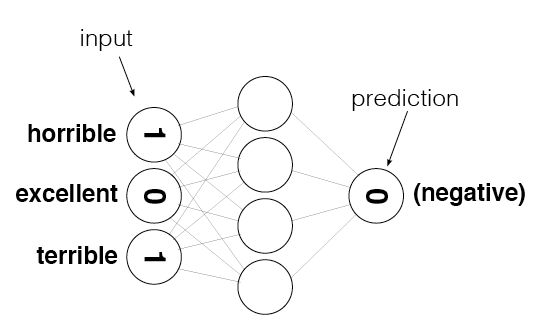

In [17]:
from IPython.display import Image

review = "This was a horrible, terrible movie."

Image(filename='sentiment_network.png')

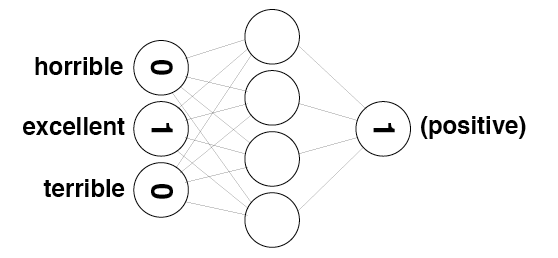

In [18]:
review = "The movie was excellent"

Image(filename='sentiment_network_pos.png')

# Project 2: Creating the Input/Output Data

In [19]:
vocab = set(total_counts.keys())
vocab_size = len(vocab)
print(vocab_size)

74074


In [20]:
list(vocab)

['',
 'kennel',
 'depreciation',
 'edifying',
 'sicence',
 'wiggly',
 'incarnate',
 'pluto',
 'monahans',
 'nirs',
 'uninterested',
 'impossible',
 'rivals',
 'pageantry',
 'minette',
 'putdowns',
 'artigot',
 'irrfan',
 'juliet',
 'menaces',
 'kor',
 'refrigerator',
 'peckingly',
 'stomached',
 'borrowings',
 'rexs',
 'hellbound',
 'sawed',
 'frizzi',
 'rutina',
 'bemoan',
 'conglomeration',
 'notebooks',
 'trading',
 'lenz',
 'allwyn',
 'fidel',
 'didja',
 'wind',
 'kibitzer',
 'edith',
 'itches',
 'risible',
 'misbegotten',
 'muere',
 'sedately',
 'thelis',
 'ranft',
 'greenaways',
 'podunk',
 'kalashnikov',
 'barris',
 'tipps',
 'dwells',
 'plod',
 'equated',
 'vests',
 'furiously',
 'manuals',
 'redblock',
 'commitment',
 'heritage',
 'ayone',
 'prophesizes',
 'burglar',
 'shalhoub',
 'ailton',
 'tantalisingly',
 'sharkish',
 'momentary',
 'gunman',
 'bilardo',
 'ozaki',
 'multilevel',
 'confiscates',
 'harling',
 'gallantry',
 'hairdresser',
 'regularity',
 'lavishness',
 'concei

In [21]:
import numpy as np

layer_0 = np.zeros((1,vocab_size))
layer_0

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.]])

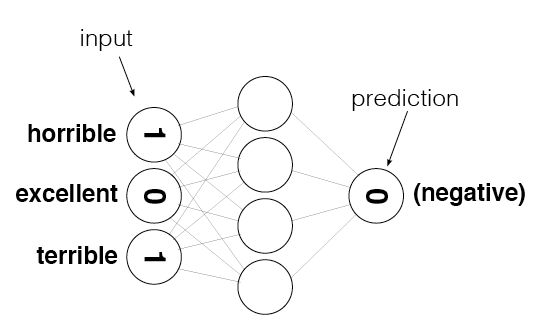

In [22]:
from IPython.display import Image
Image(filename='sentiment_network.png')

In [23]:
word2index = {}

for i,word in enumerate(vocab):
    word2index[word] = i
word2index

{'': 0,
 'kennel': 1,
 'edifying': 3,
 'sicence': 4,
 'chow': 37077,
 'wiggly': 5,
 'incarnate': 6,
 'pluto': 7,
 'monahans': 8,
 'nirs': 9,
 'uninterested': 10,
 'impossible': 11,
 'depreciation': 2,
 'rivals': 12,
 'pageantry': 13,
 'artigot': 16,
 'juliet': 18,
 'menaces': 19,
 'kor': 20,
 'stomached': 23,
 'borrowings': 24,
 'rexs': 25,
 'snugly': 37080,
 'hellbound': 26,
 'sawed': 27,
 'latimore': 12520,
 'frizzi': 28,
 'rutina': 29,
 'notebooks': 32,
 'conglomeration': 31,
 'fidel': 36,
 'lenz': 34,
 'disgraces': 2542,
 'didja': 37,
 'denied': 53524,
 'itches': 41,
 'kibitzer': 39,
 'edith': 40,
 'supplanted': 49497,
 'risible': 42,
 'misbegotten': 43,
 'thelis': 46,
 'ranft': 47,
 'greenaways': 48,
 'scabby': 61811,
 'podunk': 49,
 'kalashnikov': 50,
 'barris': 51,
 'equated': 55,
 'plod': 54,
 'vests': 56,
 'huze': 61813,
 'redblock': 59,
 'commitment': 60,
 'heritage': 61,
 'ayone': 62,
 'prophesizes': 63,
 'burglar': 64,
 'ailton': 66,
 'sharkish': 68,
 'momentary': 69,
 'gun

In [24]:
def update_input_layer(review):
    
    global layer_0
    
    # clear out previous state, reset the layer to be all 0s
    layer_0 *= 0
    for word in review.split(" "):
        layer_0[0][word2index[word]] += 1

update_input_layer(reviews[0])

In [25]:
layer_0

array([[ 18.,   0.,   0., ...,   0.,   0.,   0.]])

In [26]:
def get_target_for_label(label):
    if(label == 'POSITIVE'):
        return 1
    else:
        return 0

In [27]:
labels[0]

'POSITIVE'

In [28]:
get_target_for_label(labels[0])

1

In [29]:
labels[1]

'NEGATIVE'

In [30]:
get_target_for_label(labels[1])

0

# Project 3: Building a Neural Network

- Start with your neural network from the last chapter
- 3 layer neural network
- no non-linearity in hidden layer
- use our functions to create the training data
- create a "pre_process_data" function to create vocabulary for our training data generating functions
- modify "train" to train over the entire corpus

### Where to Get Help if You Need it
- Re-watch previous week's Udacity Lectures
- Chapters 3-5 - [Grokking Deep Learning](https://www.manning.com/books/grokking-deep-learning) - (40% Off: **traskud17**)

In [31]:
import numpy as np
import time
import sys

np.seterr(all='warn')
class SentimentNetwork(object):
    def __init__(self, reviews, labels, hidden_nodes = 10, learning_rate = 0.1):
        self.hidden_nodes = hidden_nodes
        
        np.random.seed(1)
        
        self.preprocess_data(reviews, labels)
        
        self.initialize_network(self.review_vocab_size, hidden_nodes, 1, learning_rate)
        
    # generate the vocabulary and mappings to indices
    def preprocess_data(self, reviews, labels):

        # process the review text into a vocad
        review_vocab = set()
        
        for review in reviews:
            for word in review.split(" "):
                review_vocab.add(word)
        
        self.review_vocab = list(review_vocab)
        
        # process the labels into a vocab
        label_vocab = set()
        for label in labels:
            label_vocab.add(label)
            
        self.label_vocab = list(label_vocab)
        
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        # build word to index and label to index maps
        
        self.word2index = {}
        for i,word in enumerate(self.review_vocab):
            self.word2index[word] = i
            
        self.label2index = {}
        for i, label in enumerate(self.label_vocab):
            self.label2index[label] = i
        
        
    def initialize_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        
        # Initialize weights
        self.weights_input_to_hidden = np.zeros((self.input_nodes, self.hidden_nodes))
        self.weights_hidden_to_output = np.random.normal(0.0, self.output_nodes**-0.5, 
                                       (self.hidden_nodes, self.output_nodes))

#         self.weights_input_to_hidden = np.zeros((self.input_nodes,self.hidden_nodes))
        self.lr = learning_rate
        
        self.layer_0 = np.zeros((1,input_nodes))    
        
    def update_input_layer(self, review):
        self.layer_0 *= 0
        for word in review.split(" "):
            if word in self.word2index:
                self.layer_0[0][self.word2index[word]] += 1
            
    def get_target_for_label(self, label):
        if(label == 'POSITIVE'):
            return 1
        else:
            return 0
    
    def sigmoid(self, x):
#         xx = np.longfloat(x)
        return 1. / (1. + np.exp(-x))
        
    def train(self, training_reviews, training_labels):      
        assert(len(training_reviews) == len(training_labels))
        
        correct_predictions = 0
        
        start = time.time()
        
        # single pass through the data
        for i in range(len(training_labels)):
            
            review = training_reviews[i]
            label = training_labels[i]
            
            ### Forward pass ###    
            
            # Input Layer
            self.update_input_layer(review)
           
            # hidden layer
            layer_1_output = np.dot(self.layer_0, self.weights_input_to_hidden)
        
            # output layer
            layer_2_output = self.sigmoid(np.dot(layer_1_output, self.weights_hidden_to_output))
            
            ### Backward pass ###

            # output error 
            layer_2_error = layer_2_output - self.get_target_for_label(label)
            layer_2_delta = layer_2_error * (layer_2_output * (1 - layer_2_output))
            
            # Backpropagated error
            layer_1_delta = np.dot(layer_2_delta, self.weights_hidden_to_output.T) # activation derivative is 1
            
            # partial derivatives of the error WRT to the weights
            d_loss_hidden_output = np.dot(layer_1_output.T, layer_2_delta)
            d_loss_input_hidden = np.dot(self.layer_0.T, layer_1_delta)

            # Update the weights
            self.weights_hidden_to_output -= self.lr * d_loss_hidden_output
            self.weights_input_to_hidden -= self.lr * d_loss_input_hidden
            
            if np.abs(layer_2_error) < 0.5:
                correct_predictions += 1
                
            reviews_per_sec = i / float(time.time() - start)

            sys.stdout.write('\rTraining Progress: ' + str(100 * i/float(len(training_reviews)))[:4] + "%, Speed (reviews/second): " + 
                            str(reviews_per_sec)[0:5] + ", #Correct: " + str(correct_predictions) + 
                            ", Total Examples: " + str(i + 1) + ", Accuracy: " + str(100 * correct_predictions/float(i + 1))[:4] + "%")
            
            if i % 2500 == 0:
                print("")
            
    def test(self, test_reviews, test_labels):
        correct_predictions = 0
        
        start = time.time()
        
        for i in range(len(test_labels)):
            prediction = self.run(test_reviews[i])
            
            if (prediction == test_labels[i]):
                correct_predictions += 1
    
            reviews_per_sec = i / float(time.time() - start)

            sys.stdout.write('\rTest Progress: ' + str(100 * i/float(len(test_reviews)))[:4] + "%, Speed (reviews/second): " + 
                            str(reviews_per_sec)[0:5] + ", #Correct: " + str(correct_predictions) + 
                            ", Total Examples: " + str(i + 1) + ", Accuracy: " + str(100 * correct_predictions/float(i + 1))[:4] + "%")
            
            if i % 2500 == 0:
                print("")        

        
    def run(self, review):
        ### Forward pass ###    
            
        # Input Layer
        self.update_input_layer(review)

        # hidden layer
        layer_1_output = np.dot(self.layer_0, self.weights_input_to_hidden)

        # output layer
        layer_2_output = self.sigmoid(np.dot(layer_1_output, self.weights_hidden_to_output))
        
        if (layer_2_output[0] > 0.5):
            return "POSITIVE"
        else:
            return "NEGATIVE"

In [35]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.1)

In [36]:
# evaluate our model before training (just to show how horrible it is)
mlp.test(reviews[-1000:],labels[-1000:])

Test Progress: 0.0%, Speed (reviews/second): 0.0, #Correct: 0, Total Examples: 1, Accuracy: 0.0%
Test Progress: 99.9%, Speed (reviews/second): 1114., #Correct: 500, Total Examples: 1000, Accuracy: 50.0%

In [37]:
# train the network
mlp.train(reviews[:-1000],labels[:-1000])

Training Progress: 0.0%, Speed (reviews/second): 0.0, #Correct: 0, Total Examples: 1, Accuracy: 0.0%
Training Progress: 0.30%, Speed (reviews/second): 357.1, #Correct: 37, Total Examples: 75, Accuracy: 49.3%

/Users/kgraham/anaconda3/envs/sentiment-analysis/lib/python3.5/site-packages/ipykernel/__main__.py:78: RuntimeWarning: underflow encountered in exp


Training Progress: 10.4%, Speed (reviews/second): 375.2, #Correct: 1250, Total Examples: 2501, Accuracy: 49.9%
Training Progress: 20.8%, Speed (reviews/second): 361.3, #Correct: 2500, Total Examples: 5001, Accuracy: 49.9%
Training Progress: 31.2%, Speed (reviews/second): 357.1, #Correct: 3750, Total Examples: 7501, Accuracy: 49.9%
Training Progress: 41.6%, Speed (reviews/second): 355.3, #Correct: 5000, Total Examples: 10001, Accuracy: 49.9%
Training Progress: 52.0%, Speed (reviews/second): 352.8, #Correct: 6250, Total Examples: 12501, Accuracy: 49.9%
Training Progress: 62.5%, Speed (reviews/second): 351.6, #Correct: 7500, Total Examples: 15001, Accuracy: 49.9%
Training Progress: 72.9%, Speed (reviews/second): 350.2, #Correct: 8750, Total Examples: 17501, Accuracy: 49.9%
Training Progress: 83.3%, Speed (reviews/second): 348.9, #Correct: 10000, Total Examples: 20001, Accuracy: 49.9%
Training Progress: 93.7%, Speed (reviews/second): 348.0, #Correct: 11250, Total Examples: 22501, Accuracy:

In [38]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.01)

In [39]:
# train the network
mlp.train(reviews[:-1000],labels[:-1000])

Training Progress: 0.0%, Speed (reviews/second): 0.0, #Correct: 0, Total Examples: 1, Accuracy: 0.0%
Training Progress: 10.4%, Speed (reviews/second): 372.9, #Correct: 1247, Total Examples: 2501, Accuracy: 49.8%
Training Progress: 15.9%, Speed (reviews/second): 371.0, #Correct: 1910, Total Examples: 3826, Accuracy: 49.9%

/Users/kgraham/anaconda3/envs/sentiment-analysis/lib/python3.5/site-packages/ipykernel/__main__.py:108: RuntimeWarning: underflow encountered in multiply


Training Progress: 20.8%, Speed (reviews/second): 368.5, #Correct: 2497, Total Examples: 5001, Accuracy: 49.9%
Training Progress: 31.2%, Speed (reviews/second): 363.8, #Correct: 3747, Total Examples: 7501, Accuracy: 49.9%
Training Progress: 31.2%, Speed (reviews/second): 363.8, #Correct: 3751, Total Examples: 7508, Accuracy: 49.9%

/Users/kgraham/anaconda3/envs/sentiment-analysis/lib/python3.5/site-packages/ipykernel/__main__.py:119: RuntimeWarning: underflow encountered in multiply


Training Progress: 41.6%, Speed (reviews/second): 361.9, #Correct: 4997, Total Examples: 10001, Accuracy: 49.9%
Training Progress: 52.0%, Speed (reviews/second): 359.6, #Correct: 6247, Total Examples: 12501, Accuracy: 49.9%
Training Progress: 62.5%, Speed (reviews/second): 356.8, #Correct: 7485, Total Examples: 15001, Accuracy: 49.8%
Training Progress: 72.9%, Speed (reviews/second): 351.4, #Correct: 8736, Total Examples: 17501, Accuracy: 49.9%
Training Progress: 83.3%, Speed (reviews/second): 348.6, #Correct: 9986, Total Examples: 20001, Accuracy: 49.9%
Training Progress: 93.7%, Speed (reviews/second): 346.3, #Correct: 11236, Total Examples: 22501, Accuracy: 49.9%
Training Progress: 99.9%, Speed (reviews/second): 345.5, #Correct: 11985, Total Examples: 24000, Accuracy: 49.9%

In [40]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.001)

In [41]:
# train the network
mlp.train(reviews[:-1000],labels[:-1000])

Training Progress: 0.0%, Speed (reviews/second): 0.0, #Correct: 0, Total Examples: 1, Accuracy: 0.0%
Training Progress: 10.4%, Speed (reviews/second): 364.6, #Correct: 1268, Total Examples: 2501, Accuracy: 50.6%
Training Progress: 20.8%, Speed (reviews/second): 361.2, #Correct: 2641, Total Examples: 5001, Accuracy: 52.8%
Training Progress: 31.2%, Speed (reviews/second): 358.1, #Correct: 4091, Total Examples: 7501, Accuracy: 54.5%
Training Progress: 41.6%, Speed (reviews/second): 354.8, #Correct: 5654, Total Examples: 10001, Accuracy: 56.5%
Training Progress: 52.0%, Speed (reviews/second): 354.6, #Correct: 7193, Total Examples: 12501, Accuracy: 57.5%
Training Progress: 62.5%, Speed (reviews/second): 354.0, #Correct: 8766, Total Examples: 15001, Accuracy: 58.4%
Training Progress: 72.9%, Speed (reviews/second): 353.4, #Correct: 10369, Total Examples: 17501, Accuracy: 59.2%
Training Progress: 83.3%, Speed (reviews/second): 352.6, #Correct: 12094, Total Examples: 20001, Accuracy: 60.4%
Trai

# Understanding Neural Noise

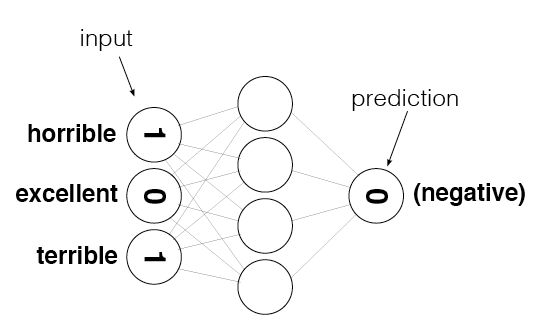

In [42]:
from IPython.display import Image
Image(filename='sentiment_network.png')

In [43]:
def update_input_layer(review):
    
    global layer_0
    
    # clear out previous state, reset the layer to be all 0s
    layer_0 *= 0
    for word in review.split(" "):
        layer_0[0][word2index[word]] += 1

update_input_layer(reviews[0])

In [44]:
layer_0

array([[ 18.,   0.,   0., ...,   0.,   0.,   0.]])

In [45]:
review_counter = Counter()

In [46]:
for word in reviews[0].split(" "):
    review_counter[word] += 1

In [47]:
review_counter.most_common()

[('.', 27),
 ('', 18),
 ('the', 9),
 ('to', 6),
 ('high', 5),
 ('i', 5),
 ('bromwell', 4),
 ('is', 4),
 ('teachers', 4),
 ('a', 4),
 ('that', 4),
 ('of', 4),
 ('my', 2),
 ('me', 2),
 ('it', 2),
 ('at', 2),
 ('as', 2),
 ('students', 2),
 ('their', 2),
 ('school', 2),
 ('in', 2),
 ('student', 2),
 ('sack', 1),
 ('financially', 1),
 ('tried', 1),
 ('believe', 1),
 ('than', 1),
 ('down', 1),
 ('reality', 1),
 ('age', 1),
 ('much', 1),
 ('same', 1),
 ('episode', 1),
 ('survive', 1),
 ('burn', 1),
 ('other', 1),
 ('see', 1),
 ('lead', 1),
 ('many', 1),
 ('and', 1),
 ('life', 1),
 ('profession', 1),
 ('closer', 1),
 ('adults', 1),
 ('through', 1),
 ('pettiness', 1),
 ('pity', 1),
 ('satire', 1),
 ('about', 1),
 ('m', 1),
 ('your', 1),
 ('scramble', 1),
 ('immediately', 1),
 ('which', 1),
 ('teaching', 1),
 ('some', 1),
 ('welcome', 1),
 ('here', 1),
 ('can', 1),
 ('ran', 1),
 ('who', 1),
 ('fetched', 1),
 ('all', 1),
 ('far', 1),
 ('cartoon', 1),
 ('repeatedly', 1),
 ('expect', 1),
 ('when', 

Looking at the above most common words, it's clear that the most frequent words contain no information regarding sentiment. This means the low-information words have higher weights than words that carry a lot of information about sentiment.

One possibility is to have a one or zero based on whether or not the word is present in the review. This would be a binary encoding.

In [109]:
# Different neural net, with one-hot encoding

import numpy as np
import time
import sys

np.seterr(all='warn')
class SentimentNetwork(object):
    def __init__(self, reviews, labels, hidden_nodes = 10, learning_rate = 0.1):
        self.hidden_nodes = hidden_nodes
        
        np.random.seed(1)
        
        self.preprocess_data(reviews, labels)
        
        self.initialize_network(self.review_vocab_size, hidden_nodes, 1, learning_rate)
        
    # generate the vocabulary and mappings to indices
    def preprocess_data(self, reviews, labels):

        # process the review text into a vocad
        review_vocab = set()
        
        for review in reviews:
            for word in review.split(" "):
                review_vocab.add(word)
        
        self.review_vocab = list(review_vocab)
        
        # process the labels into a vocab
        label_vocab = set()
        for label in labels:
            label_vocab.add(label)
            
        self.label_vocab = list(label_vocab)
        
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        # build word to index and label to index maps
        
        self.word2index = {}
        for i,word in enumerate(self.review_vocab):
            self.word2index[word] = i
            
        self.label2index = {}
        for i, label in enumerate(self.label_vocab):
            self.label2index[label] = i
        
        
    def initialize_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        
        # Initialize weights
        self.weights_input_to_hidden = np.zeros((self.input_nodes, self.hidden_nodes))
        self.weights_hidden_to_output = np.random.normal(0.0, self.output_nodes**-0.5, 
                                       (self.hidden_nodes, self.output_nodes))

#         self.weights_input_to_hidden = np.zeros((self.input_nodes,self.hidden_nodes))
        self.lr = learning_rate
        
        self.layer_0 = np.zeros((1,input_nodes))    
        
    def update_input_layer(self, review):
        self.layer_0 *= 0
        for word in review.split(" "):
            if word in self.word2index:
                self.layer_0[0][self.word2index[word]] = 1
            
    def get_target_for_label(self, label):
        if(label == 'POSITIVE'):
            return 1
        else:
            return 0
    
    def sigmoid(self, x):
#         xx = np.longfloat(x)
        return 1. / (1. + np.exp(-x))
        
    def train(self, training_reviews, training_labels):      
        assert(len(training_reviews) == len(training_labels))
        
        correct_predictions = 0
        
        start = time.time()
        
        # single pass through the data
        for i in range(len(training_labels)):
            
            review = training_reviews[i]
            label = training_labels[i]
            
            ### Forward pass ###    
            
            # Input Layer
            self.update_input_layer(review)
           
            # hidden layer
            layer_1_output = np.dot(self.layer_0, self.weights_input_to_hidden)
        
            # output layer
            layer_2_output = self.sigmoid(np.dot(layer_1_output, self.weights_hidden_to_output))
            
            ### Backward pass ###

            # output error 
            layer_2_error = layer_2_output - self.get_target_for_label(label)
            layer_2_delta = layer_2_error * (layer_2_output * (1 - layer_2_output))
            
            # Backpropagated error
            layer_1_delta = np.dot(layer_2_delta, self.weights_hidden_to_output.T) # activation derivative is 1
            
            # partial derivatives of the error WRT to the weights
            d_loss_hidden_output = np.dot(layer_1_output.T, layer_2_delta)
            d_loss_input_hidden = np.dot(self.layer_0.T, layer_1_delta)

            # Update the weights
            self.weights_hidden_to_output -= self.lr * d_loss_hidden_output
            self.weights_input_to_hidden -= self.lr * d_loss_input_hidden
            
            if np.abs(layer_2_error) < 0.5:
                correct_predictions += 1
                
            reviews_per_sec = i / float(time.time() - start)

            sys.stdout.write('\rTraining Progress: ' + str(100 * i/float(len(training_reviews)))[:4] + "%, Speed (reviews/second): " + 
                            str(reviews_per_sec)[0:5] + ", #Correct: " + str(correct_predictions) + 
                            ", Total Examples: " + str(i + 1) + ", Accuracy: " + str(100 * correct_predictions/float(i + 1))[:4] + "%")
            
            if i % 2500 == 0:
                print("")
            
    def test(self, test_reviews, test_labels):
        correct_predictions = 0
        
        start = time.time()
        
        for i in range(len(test_labels)):
            prediction = self.run(test_reviews[i])
            
            if (prediction == test_labels[i]):
                correct_predictions += 1
    
            reviews_per_sec = i / float(time.time() - start)

            sys.stdout.write('\rTest Progress: ' + str(100 * i/float(len(test_reviews)))[:4] + "%, Speed (reviews/second): " + 
                            str(reviews_per_sec)[0:5] + ", #Correct: " + str(correct_predictions) + 
                            ", Total Examples: " + str(i + 1) + ", Accuracy: " + str(100 * correct_predictions/float(i + 1))[:4] + "%")
            
            if i % 2500 == 0:
                print("")        

        
    def run(self, review):
        ### Forward pass ###    
            
        # Input Layer
        self.update_input_layer(review)

        # hidden layer
        layer_1_output = np.dot(self.layer_0, self.weights_input_to_hidden)

        # output layer
        layer_2_output = self.sigmoid(np.dot(layer_1_output, self.weights_hidden_to_output))
        
        if (layer_2_output[0] > 0.5):
            return "POSITIVE"
        else:
            return "NEGATIVE"

In [110]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.001)

In [111]:
# train the network
mlp.train(reviews[:-1000],labels[:-1000])

Training Progress: 0.0%, Speed (reviews/second): 0.0, #Correct: 0, Total Examples: 1, Accuracy: 0.0%
Training Progress: 10.4%, Speed (reviews/second): 388.4, #Correct: 1940, Total Examples: 2501, Accuracy: 77.5%
Training Progress: 20.8%, Speed (reviews/second): 370.4, #Correct: 3987, Total Examples: 5001, Accuracy: 79.7%
Training Progress: 31.2%, Speed (reviews/second): 357.6, #Correct: 6085, Total Examples: 7501, Accuracy: 81.1%
Training Progress: 41.6%, Speed (reviews/second): 352.5, #Correct: 8204, Total Examples: 10001, Accuracy: 82.0%
Training Progress: 52.0%, Speed (reviews/second): 350.7, #Correct: 10337, Total Examples: 12501, Accuracy: 82.6%
Training Progress: 62.5%, Speed (reviews/second): 349.3, #Correct: 12423, Total Examples: 15001, Accuracy: 82.8%
Training Progress: 72.9%, Speed (reviews/second): 348.9, #Correct: 14524, Total Examples: 17501, Accuracy: 82.9%
Training Progress: 83.3%, Speed (reviews/second): 348.4, #Correct: 16697, Total Examples: 20001, Accuracy: 83.4%
Tr

In [51]:
mlp.test(reviews[-1000:], labels[-1000:])

Test Progress: 0.0%, Speed (reviews/second): 0.0, #Correct: 1, Total Examples: 1, Accuracy: 100.%
Test Progress: 99.9%, Speed (reviews/second): 1369., #Correct: 848, Total Examples: 1000, Accuracy: 84.8%

## Analyzing Inefficiencies in our Network

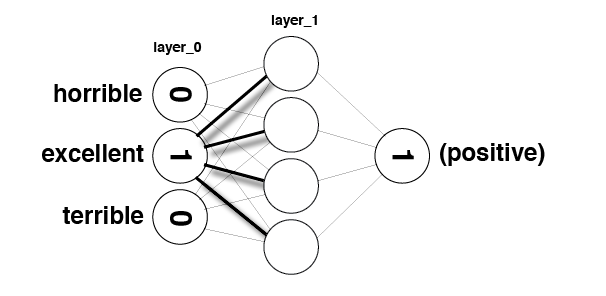

In [52]:
from IPython.display import Image
Image(filename='sentiment_network_sparse.png')

The input vectors are sparse, since only a few elements are nonzero. This means that the output of the hidden layer will also be a sparse vector. Due to the sparsity we can skip performing the full matrix multiplication and can take a shortcut. This will greatly speed up the training process.

For instance, consider an input layer of length 10:

In [54]:
layer_0 = np.zeros(10)
layer_0

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [55]:
layer_0[3] = 1
layer_0[8] = 1
layer_0

array([ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.])

Now consider the weights:

In [57]:
weights_input_hidden = np.random.randn(10,5)

In [58]:
np.dot(layer_0, weights_input_hidden)

array([-2.46932978,  0.91830369,  1.23146628,  0.82367326, -0.33290067])

We can perform a sparse matrix multiplication by storing the indices of nonzero elements in `layer_0` and only using those elements and the corresponding column of the weight matrix (here) for the matrix multiplication.

In [59]:
nonzero_indices = [3,8]

In [66]:
layer_1 = np.zeros(5)

In [67]:
for index in nonzero_indices:
    layer_1 += 1 * weights_input_hidden[index]

In [63]:
layer_1 

array([-2.46932978,  0.91830369,  1.23146628,  0.82367326, -0.33290067])

In [140]:
# Different neural net, with one-hot encoding

import numpy as np
import time
import sys

np.seterr(all='warn')
class SparseSentimentNetwork(object):
    def __init__(self, reviews, labels, hidden_nodes = 10, learning_rate = 0.1):
        self.hidden_nodes = hidden_nodes
        
        np.random.seed(1)
        
        self.preprocess_data(reviews, labels)
        
        self.initialize_network(self.review_vocab_size, hidden_nodes, 1, learning_rate)
        
    # generate the vocabulary and mappings to indices
    def preprocess_data(self, reviews, labels):

        # process the review text into a vocad
        review_vocab = set()
        
        for review in reviews:
            for word in review.split(" "):
                review_vocab.add(word)
        
        self.review_vocab = list(review_vocab)
        
        # process the labels into a vocab
        label_vocab = set()
        for label in labels:
            label_vocab.add(label)
            
        self.label_vocab = list(label_vocab)
        
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        # build word to index and label to index maps
        
        self.word2index = {}
        for i,word in enumerate(self.review_vocab):
            self.word2index[word] = i
            
        self.label2index = {}
        for i, label in enumerate(self.label_vocab):
            self.label2index[label] = i
        
        
    def initialize_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        
        # Initialize weights
        self.weights_input_to_hidden = np.zeros((self.input_nodes, self.hidden_nodes))
        self.weights_hidden_to_output = np.random.normal(0.0, self.output_nodes**-0.5, 
                                       (self.hidden_nodes, self.output_nodes))

        self.lr = learning_rate        
        self.layer_0 = np.zeros((1,input_nodes))    
        self.layer_1_output = np.zeros((1,hidden_nodes))
        
    def update_input_layer(self, review):
        self.layer_0 *= 0
        self.layer_0_sparse_indices = set()
        for word in review.split(" "):
            if word in self.word2index:
                self.layer_0[0][self.word2index[word]] = 1
                self.layer_0_sparse_indices.add(self.word2index[word])
        
        # note the indices of nonzero elements
        self.layer_0_sparse_indices = list(self.layer_0_sparse_indices)
            
    def get_target_for_label(self, label):
        if(label == 'POSITIVE'):
            return 1
        else:
            return 0
    
    def sigmoid(self, x):
#         xx = np.longfloat(x)
        return 1. / (1. + np.exp(-x))
        
    def train(self, training_reviews, training_labels):  
        # for each training review, see which indices have nonzero entries
        assert(len(training_reviews) == len(training_labels))
        
        correct_predictions = 0
        
        start = time.time()
        
        # single pass through the data
        for i in range(len(training_labels)):
            
            review = training_reviews[i]
            label = training_labels[i]
            
            ### Forward pass ###    
            
            # Input Layer
            self.update_input_layer(review)
           
            # hidden layer
#             layer_1_output = np.dot(self.layer_0, self.weights_input_to_hidden)
            self.layer_1_output *= 0
            for index in self.layer_0_sparse_indices:
                self.layer_1_output += self.weights_input_to_hidden[index]
                    
            # output layer
            layer_2_output = self.sigmoid(np.dot(self.layer_1_output, self.weights_hidden_to_output))
            
            ### Backward pass ###

            # output error 
            layer_2_error = layer_2_output - self.get_target_for_label(label)
            layer_2_delta = layer_2_error * (layer_2_output * (1 - layer_2_output))
            
            # Backpropagated error
            layer_1_delta = np.dot(layer_2_delta, self.weights_hidden_to_output.T) # activation derivative is 1
            
            # partial derivatives of the error WRT to the weights
            d_loss_hidden_output = np.dot(self.layer_1_output.T, layer_2_delta)
#             d_loss_input_hidden = np.dot(self.layer_0.T, layer_1_delta)

            # Update the weights
            self.weights_hidden_to_output -= self.lr * d_loss_hidden_output
#             self.weights_input_to_hidden -= self.lr * d_loss_input_hidden

            for index in self.layer_0_sparse_indices:
                self.weights_input_to_hidden[index] -= self.lr * layer_1_delta[0]
            
            if np.abs(layer_2_error) < 0.5:
                correct_predictions += 1
                
            reviews_per_sec = i / float(time.time() - start)

            sys.stdout.write('\rTraining Progress: ' + str(100 * i/float(len(training_reviews)))[:4] + "%, Speed (reviews/second): " + 
                            str(reviews_per_sec)[0:5] + ", #Correct: " + str(correct_predictions) + 
                            ", Total Examples: " + str(i + 1) + ", Accuracy: " + str(100 * correct_predictions/float(i + 1))[:4] + "%")
            
            if i % 2500 == 0:
                print("")
            
    def test(self, test_reviews, test_labels):
        correct_predictions = 0
        
        start = time.time()
        
        for i in range(len(test_labels)):
            prediction = self.run(test_reviews[i])
            
            if (prediction == test_labels[i]):
                correct_predictions += 1
    
            reviews_per_sec = i / float(time.time() - start)

            sys.stdout.write('\rTest Progress: ' + str(100 * i/float(len(test_reviews)))[:4] + "%, Speed (reviews/second): " + 
                            str(reviews_per_sec)[0:5] + ", #Correct: " + str(correct_predictions) + 
                            ", Total Examples: " + str(i + 1) + ", Accuracy: " + str(100 * correct_predictions/float(i + 1))[:4] + "%")
            
            if i % 2500 == 0:
                print("")        

        
    def run(self, review):
        ### Forward pass ###    
            
        # Input Layer
        self.update_input_layer(review)

        # hidden layer
#         layer_1_output = np.dot(self.layer_0, self.weights_input_to_hidden)

        self.layer_1_output *= 0
        for index in self.layer_0_sparse_indices:
            self.layer_1_output += self.weights_input_to_hidden[index]
            
#         layer_1_output = layer_1_output[None,:]

        # output layer
        layer_2_output = self.sigmoid(np.dot(self.layer_1_output, self.weights_hidden_to_output))
        
        if (layer_2_output[0] > 0.5):
            return "POSITIVE"
        else:
            return "NEGATIVE"

In [141]:
mlp = SparseSentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.001)

In [142]:
# train the network
mlp.train(reviews[:-1000],labels[:-1000])

Training Progress: 0.0%, Speed (reviews/second): 0.0, #Correct: 0, Total Examples: 1, Accuracy: 0.0%
Training Progress: 10.4%, Speed (reviews/second): 1186., #Correct: 1940, Total Examples: 2501, Accuracy: 77.5%
Training Progress: 20.8%, Speed (reviews/second): 1168., #Correct: 3987, Total Examples: 5001, Accuracy: 79.7%
Training Progress: 31.2%, Speed (reviews/second): 1163., #Correct: 6085, Total Examples: 7501, Accuracy: 81.1%
Training Progress: 41.6%, Speed (reviews/second): 1161., #Correct: 8204, Total Examples: 10001, Accuracy: 82.0%
Training Progress: 52.0%, Speed (reviews/second): 1150., #Correct: 10337, Total Examples: 12501, Accuracy: 82.6%
Training Progress: 62.5%, Speed (reviews/second): 1142., #Correct: 12423, Total Examples: 15001, Accuracy: 82.8%
Training Progress: 72.9%, Speed (reviews/second): 1137., #Correct: 14524, Total Examples: 17501, Accuracy: 82.9%
Training Progress: 83.3%, Speed (reviews/second): 1136., #Correct: 16697, Total Examples: 20001, Accuracy: 83.4%
Tr

Training is considerably faster now. Easily a facter of 3x. With more data and higher dimensions, it will be even more apparent.